# Vendedor Viajero: Algortimo Genético.

In [ ]:
import folium
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings

### Descarga de datos:

In [ ]:
# Se cargan la matriz de distancias y de costo en peajes:
distancias = np.loadtxt("https://raw.githubusercontent.com/JavierDarioE/Simulacion_Misc/main/distancias.csv",
                 delimiter=",")
display(distancias)
peajes = np.loadtxt("https://raw.githubusercontent.com/JavierDarioE/Simulacion_Misc/main/peajes.csv",
                 delimiter=",")
display(peajes)

array([[   0.,  401.,   79.,  438.,  194.,  165.,  241., 1102.,  806.,
        1234., 1031., 1237.,  401.,  752.,  945.],
       [ 401.,    0.,  467.,  845.,  582.,  559.,  424., 1493., 1203.,
        1623., 1434., 1631.,  802., 1140., 1329.],
       [  79.,  467.,    0.,  361.,  118.,   88.,  170., 1031.,  726.,
        1156.,  961., 1165.,  329.,  674.,  865.],
       [ 438.,  845.,  361.,    0.,  318.,  282.,  302.,  867.,  832.,
         995., 1050.,  979.,  443.,  407.,  557.],
       [ 194.,  582.,  118.,  318.,    0.,   48.,   54.,  913.,  621.,
        1042.,  849., 1050.,  215.,  559.,  747.],
       [ 165.,  559.,   88.,  282.,   48.,    0.,   39.,  949.,  663.,
        1082.,  903.,  968.,  268.,  594.,  804.],
       [ 241.,  424.,  170.,  302.,   54.,   39.,    0.,  860.,  600.,
         993.,  831.,  894.,  194.,  508.,  694.],
       [1102., 1493., 1031.,  867.,  913.,  949.,  860.,    0.,  433.,
         296.,  365.,  295.,  745.,  449.,  525.],
       [ 806., 1203.,  7

array([[     0.,  46600.,  27500.,  99600.,  49600.,  47900.,  75700.,
        160000., 170300., 213900., 203600., 175900.,  93000., 122800.,
        140100.],
       [ 46600.,      0.,  55900., 133900.,  80300.,  78500., 104700.,
        183400., 199200., 233500., 229500., 222200., 122500., 156000.,
        171100.],
       [ 27500.,  55900.,      0., 144200.,  22100.,  40800.,  57300.,
        141600., 142800., 186400., 183400., 267800.,  74600., 328900.,
        129500.],
       [ 99600., 133900., 144200.,      0.,  70700.,  55400.,  45400.,
        103700., 137900., 139000., 130800., 142500.,  74800.,  55100.,
         42600.],
       [ 49600.,  80300.,  22100.,  70700.,      0.,  15300.,  24400.,
        103100., 118900., 164300., 149200., 141900.,  42200.,  75700.,
         90800.],
       [ 47900.,  78500.,  40800.,  55400.,  15300.,      0.,  39700.,
        100000., 134200., 138100., 164500., 138800.,  57500.,  72600.,
         87700.],
       [ 75700., 104700.,  57300.,  4540

### Preparación de la matriz de costos.

In [ ]:
consumoKwid = 1/85 # Consumo en galones por km del renault kwid.
galonGasolina = 10766 # Precio del galón de gasolina.
velPromedio = 75 # velocidad promedio a la que se conducirá el vehículo.
horaVendedor = 8000 # Salario poor hora del vendedor.

In [ ]:
galones = distancias * consumoKwid # Es la cantidad de galones consumidos por cada una de las distancias teniendo en cuenta el consumo del renault Kwid
costoGasolina = galones * galonGasolina # Es el costo en gasolina del trayecto por cada distancia
costoViaje = costoGasolina + peajes # Es el costo de la gasolina por cada trayecto más el valor total de los peajes entre cada ciudad
sueldoVendedor = (distancias/velPromedio) * horaVendedor # Es el tiempo que se tarda en recorrer cada trayecto a una velocidad promedio de 75 km/hora multiplicado por el valor de la hora del vendedor
costoTotal = costoViaje + sueldoVendedor

In [ ]:
cities = list(range(len(costoTotal)))
cities

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

### Implementación del algoritmo genético.

In [ ]:
class Population():
  def __init__(self, bag, adjacency_mat):
    self.bag = bag
    self.parents = []
    self.score = 0
    self.best = None
    self.adjacency_mat = adjacency_mat

def generate_pop_array(cities):
  arr = np.random.permutation(cities[1:])
  arr = np.insert(arr, 0, 0)
  arr = np.append(arr, 0)
  return arr

def init_population(cities, adjacency_mat, n_population):
  population_array = np.asarray([generate_pop_array(cities) for i in range(n_population)])
  return Population(population_array, adjacency_mat)

def fitness(self, chromosome):
  return sum(
    [
      self.adjacency_mat[chromosome[i], chromosome[i + 1]]
      for i in range(len(chromosome) - 1)
    ]
  )

def evaluate(self):
  distances = np.asarray(
    [self.fitness(chromosome) for chromosome in self.bag]
  )
  self.score = np.min(distances)
  self.best = self.bag[distances.tolist().index(self.score)]
  self.parents.append(self.best)
  if False in (distances[0] == distances):
      distances = np.max(distances) - distances
  return distances / np.sum(distances)
    
def select(self, k=4):
    fit = self.evaluate()
    while len(self.parents) < k:
        idx = np.random.randint(0, len(fit))
        if fit[idx] > np.random.rand():
            self.parents.append(self.bag[idx])
    self.parents = np.asarray(self.parents)

def swap(chromosome):
    a, b = np.random.choice(len(chromosome), 2)
    chromosome[a], chromosome[b] = (
        chromosome[b],
        chromosome[a],
    )
    return chromosome

def crossover(self, p_cross=0.1):
    children = []
    count, size = self.parents.shape
    for _ in range(len(self.bag)):
        if np.random.rand() > p_cross:
            children.append(
                list(self.parents[np.random.randint(count, size=1)[0]])
            )
        else:
            parent1, parent2 = self.parents[
                np.random.randint(count, size=2), :
            ]
            idx = np.random.choice(range(size), size=2, replace=False)
            start, end = min(idx), max(idx)
            child = [None] * size
            child[0] = 0
            child[-1] = 0
            for i in range(start, end + 1, 1):
                child[i] = parent1[i]
            pointer = 0
            for i in range(size):
                if child[i] is None:
                    while pointer<15 and parent2[pointer] in child:
                        pointer += 1
                    child[i] = parent2[pointer]
            children.append(child)
    return children

def mutate(self, p_cross=0.1, p_mut=0.1):
    next_bag = []
    children = self.crossover(p_cross)
    for child in children:
        if np.random.rand() < p_mut:
            temp = [0]
            temp += swap(child[1:-1])
            temp.append(0)
            next_bag.append(temp)
        else:
            next_bag.append(child)
    return next_bag
    
def genetic_algorithm(
    cities,
    adjacency_mat,
    n_population=35,
    n_iter=10000,
    selectivity=0.1,
    p_cross=0.5,
    p_mut=0.1,
    print_interval=1000,
    return_history=False,
    verbose=False,
):
    pop = init_population(cities, adjacency_mat, n_population)
    best = pop.best
    score = float("inf")
    history = []
    for i in range(n_iter):
        pop.select(n_population * selectivity)
        history.append(pop.score)
        if verbose:
            print(f"Generation {i}: {pop.score}")
        elif i % print_interval == 0:
            print(f"Generation {i}: {pop.score}")
        if pop.score < score:
            best = pop.best
            score = pop.score
        children = pop.mutate(p_cross, p_mut)
        pop = Population(children, pop.adjacency_mat)
    if return_history:
        return best, history
    return best

pop = init_population(cities, costoTotal, 15)
pop.bag

Population.fitness = fitness

Population.evaluate = evaluate

Population.select = select

Population.crossover = crossover

Population.mutate = mutate

### Resultados

In [ ]:
nombres = {
    "0": 'Palmira',
    "1": 'Pasto',
    "2": 'Tulúa',
    "3": 'Bogotá',
    "4": 'Pereira',
    "5": 'Armenia',
    "6": 'Manizales',
    "7": 'Valledupar',
    "8": 'Monteria',
    "9": 'Soledad',
    "10": 'Cartagena',
    "11": 'Barranquilla',
    "12": 'Medellin',
    "13":'Bucaramanga',
    "14": 'Cucuta'
  }

In [ ]:
best_path = genetic_algorithm(cities, costoTotal, verbose=False)
print([nombres[str(i)] for i in best_path])

Generation 0: 2889707.7098039216
Generation 1000: 1492436.8862745096
Generation 2000: 1492436.8862745096
Generation 3000: 1492436.8862745096
Generation 4000: 1492436.8862745096
Generation 5000: 1492436.8862745096
Generation 6000: 1492436.8862745096
Generation 7000: 1492436.8862745096
Generation 8000: 1492436.8862745096
Generation 9000: 1492436.8862745096
['Palmira', 'Tulúa', 'Pereira', 'Armenia', 'Bogotá', 'Bucaramanga', 'Cucuta', 'Valledupar', 'Barranquilla', 'Soledad', 'Cartagena', 'Monteria', 'Medellin', 'Manizales', 'Pasto', 'Palmira']


In [ ]:
best_path = genetic_algorithm(cities, costoTotal, verbose=False)
print([nombres[str(i)] for i in best_path])

Generation 0: 2505783.4196078433
Generation 1000: 1702798.831372549
Generation 2000: 1702798.831372549
Generation 3000: 1537035.756862745
Generation 4000: 1537035.756862745
Generation 5000: 1537035.756862745
Generation 6000: 1537035.756862745
Generation 7000: 1537035.756862745
Generation 8000: 1537035.756862745
Generation 9000: 1537035.756862745
['Palmira', 'Pasto', 'Tulúa', 'Armenia', 'Pereira', 'Manizales', 'Medellin', 'Monteria', 'Cartagena', 'Soledad', 'Barranquilla', 'Valledupar', 'Cucuta', 'Bucaramanga', 'Bogotá', 'Palmira']


In [ ]:
best_path = genetic_algorithm(cities, costoTotal, verbose=False)
print([nombres[str(i)] for i in best_path])

Generation 0: 3125536.635294118
Generation 1000: 1693632.4156862744
Generation 2000: 1563001.8666666672
Generation 3000: 1539668.6117647057
Generation 4000: 1539668.6117647057
Generation 5000: 1539668.6117647057
Generation 6000: 1524802.5019607842
Generation 7000: 1508235.780392157
Generation 8000: 1508235.780392157
Generation 9000: 1508235.780392157
['Palmira', 'Tulúa', 'Pereira', 'Manizales', 'Medellin', 'Monteria', 'Cartagena', 'Soledad', 'Barranquilla', 'Valledupar', 'Cucuta', 'Bucaramanga', 'Bogotá', 'Armenia', 'Pasto', 'Palmira']


In [ ]:
# Convertir la lista con las ciudades recorridas en orden a una lista los números en texto
ciudades = [str(i) for i in best_path]

# Coordenadas de las ciudades
# Enlace de coordenadas: https://www.geodatos.net/coordenadas/colombia/

coordenadas = {
    "0": [3.53944, -76.30361], # Palmira
    "1": [1.21361, -77.28111], # Pasto
    "2": [4.08466, -76.19536], # Tulúa
    "3": [4.60971, -74.08175], # Bogotá
    "4": [4.81333, -75.69611], # Pereira
    "5": [4.53389, -75.68111], # Armenia
    "6": [5.06889, -75.51738], # Manizales
    "7": [10.46314, -73.25322], # Valledupar
    "8": [8.74798, -75.88143], # Monteria
    "9": [10.91843, -74.76459], # Soledad
    "10": [10.39972, -75.51444], # Cartagena
    "11": [10.96854, -74.78132], # Barranquilla
    "12": [6.25184, -75.56359], # Medellin
    "13": [7.12539, -73.1198], # Bucaramanga
    "14": [7.89391, -72.50782] # Cucuta
  }

nombres = {
    "0": 'Palmira',
    "1": 'Pasto',
    "2": 'Tulúa',
    "3": 'Bogotá',
    "4": 'Pereira',
    "5": 'Armenia',
    "6": 'Manizales',
    "7": 'Valledupar',
    "8": 'Monteria',
    "9": 'Soledad',
    "10": 'Cartagena',
    "11": 'Barranquilla',
    "12": 'Medellin',
    "13":'Bucaramanga',
    "14": 'Cucuta'
  }

# Creamos el mapa y lo ubicamos en la ciudad inicial
mapa = folium.Map(location=coordenadas[ciudades[0]], zoom_start=6)

# Agregar un marcador para cada ciudad
for ciudad in ciudades:
  folium.Marker(
      location=coordenadas[ciudad],
      #popup=ciudad,
      tooltip=nombres[ciudad] # Muestra el nombre de cada ciudad al pasar el mouse
  ).add_to(mapa)

# Dibujar la ruta entre las ciudades
ruta = []
for ciudad in ciudades:
    ruta.append(coordenadas[ciudad])
folium.PolyLine(
    locations=ruta,
    color='red'
).add_to(mapa)

# Mostrar el mapa
mapa

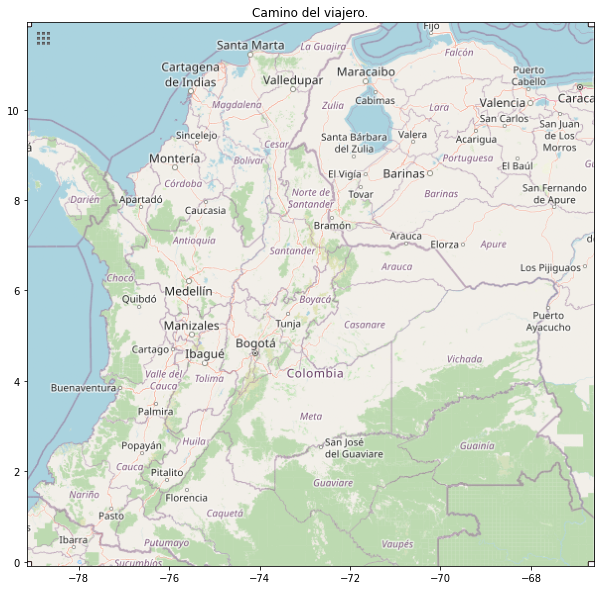

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML
from PIL import Image
import urllib

BBox = (-79.146,   -66.599,      
        -0.088, 11.932)
fig, ax = plt.subplots(figsize=(11,10))
#ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ruta_x = [coordenadas[ciudad][1] for ciudad in ciudades]
ruta_y = [coordenadas[ciudad][0] for ciudad in ciudades]
urllib.request.urlretrieve("https://github.com/JavierDarioE/Simulacion_Misc/raw/main/map.png", "map.png")
img = Image.open("map.png")
ruh_m = plt.imread("./map.png")
ax.set_title('Camino del viajero.')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox)

plot, = ax.plot([], [], color='red')

def init():
    plot.set_data([],[])
    return (plot,)

def animate(i):
    x_points = ruta_x[0:i]
    y_points = ruta_y[0:i]
    plot.set_data(x_points, y_points)
    return (plot,)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(ruta_x)+1, interval=1000, blit=True)

# Gif del recorrido optimo encontrado

In [ ]:
HTML(anim.to_html5_video())